In [5]:
import pandas as pd
import numpy as np

In [123]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [128]:
test.head()        

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [127]:
def trata_sex(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
train['Sex_bin'] = train['Sex'].map(trata_sex)
test['Sex_bin'] = train['Sex'].map(trata_sex)

In [32]:
train.head()
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [125]:
#variaveis = ['Sex_bin','Age']
#adicionar mais variaveis no modelo

variaveis = ['Sex_bin','Age','Pclass','SibSp','Parch','Fare']


In [108]:
x = train[variaveis]
y = train['Survived']

x = x.fillna(-1) #substitui os missing por -1

In [109]:
x.head()

,Sex_bin,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [110]:
#etapas de validação do modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [111]:
np.random.seed(0) #travar a aleatoriedade
x_treino,x_valid,y_treino,y_valid = train_test_split(x,y, test_size = 0.5)


In [112]:
x_treino.head()

,Sex_bin,Age,Pclass,SibSp,Parch,Fare
213,0,30.0,2,0,0,13.0000
586,0,47.0,2,0,0,15.0000
499,0,24.0,3,0,0,7.7958
821,0,27.0,3,0,0,8.6625
246,1,25.0,3,0,0,7.7750


In [113]:
x_treino.shape,x_valid.shape,y_treino.shape,y_valid.shape

((445, 6), (446, 6), (445,), (446,))

In [114]:
modelo = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)
modelo.fit(x_treino,y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [115]:
p = modelo.predict(x_valid)
p

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [116]:
np.mean(y_valid == p)

0.7802690582959642

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

In [118]:
resultados = []

kf = RepeatedKFold(n_splits=2,n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(x):
    print('Treino:', linhas_treino.shape[0])
    print('Valid:', linhas_valid.shape[0])

    x_treino = x.iloc[linhas_treino]
    x_valid = x.iloc[linhas_valid]
    y_treino = y.iloc[linhas_treino]
    y_valid = y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)
    modelo.fit(x_treino,y_treino)
    p = modelo.predict(x_valid)
    np.mean(y_valid == p)

    #armazenar essa média da acuraria em uma lista pra checar depois
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print(acc)

Treino: 445
Valid: 446
0.7869955156950673
Treino: 446
Valid: 445
0.7797752808988764
Treino: 445
Valid: 446
0.827354260089686
Treino: 446
Valid: 445
0.8179775280898877
Treino: 445
Valid: 446
0.7847533632286996
Treino: 446
Valid: 445
0.7842696629213484
Treino: 445
Valid: 446
0.8161434977578476
Treino: 446
Valid: 445
0.7842696629213484
Treino: 445
Valid: 446
0.8004484304932735
Treino: 446
Valid: 445
0.8
Treino: 445
Valid: 446
0.8183856502242153
Treino: 446
Valid: 445
0.802247191011236
Treino: 445
Valid: 446
0.8116591928251121
Treino: 446
Valid: 445
0.8067415730337079
Treino: 445
Valid: 446
0.820627802690583
Treino: 446
Valid: 445
0.7887640449438202
Treino: 445
Valid: 446
0.8385650224215246
Treino: 446
Valid: 445
0.8044943820224719
Treino: 445
Valid: 446
0.7982062780269058
Treino: 446
Valid: 445
0.8112359550561797


In [119]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

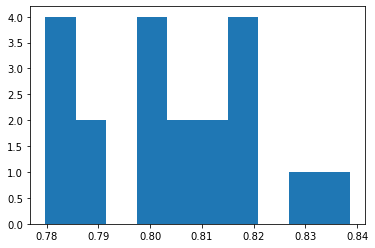

In [120]:
pylab.hist(resultados)

In [121]:
np.mean(resultados)

0.8041457147175896

In [136]:
#como a assertividade foi boa, vamos retreinar o modelo sem os split

x.head()

modelo = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=0)
modelo.fit(x,y)
p = modelo.predict(test[variaveis].fillna(-1))

primeiro_modelo = 0.7499405451705546

In [137]:
sub = pd.Series(p,index=test['PassengerId'],name='Survived')
sub.shape

(418,)

In [138]:
sub.to_csv('Modelo_Final.csv',header=True)

In [139]:
sub

PassengerId
892     0
893     0
894     0
895     1
896     0
       ..
1305    0
1306    0
1307    0
1308    0
1309    1
Name: Survived, Length: 418, dtype: int64